# Data Preparation For training a Deep Learning model to differentiate between images of healthy lungs and those with pneumonia.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
import pandas as pd
%matplotlib inline

In [10]:


os.chdir("G:")

In [11]:
cd

C:\Users\ajdin


In [12]:
DATADIRECTORY = r"G:\chest_xray\train" 

In [13]:
DATADIRECTORY_test = r"G:\chest_xray\test"

In [14]:
categories = ["NORMAL", "PNEUMONIA"]

In [ ]:
for cat in categories:
    path = os.path.join(DATADIRECTORY, cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [15]:
img_array.shape

(1858, 2090)

In [16]:
IMG_SIZE = 300

normalized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

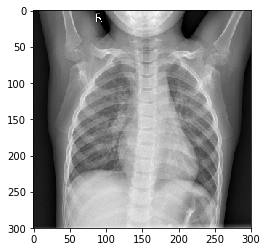

In [17]:
plt.imshow(normalized_array, cmap="gray")
plt.show()

In [18]:
training_data = []
def training_data_generator():
    for cat in categories:
        path = os.path.join(DATADIRECTORY, cat)
        class_num = categories.index(cat)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                normalized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([normalized_array, class_num])
            except Exception as e:
                pass
           

In [39]:
test_data = []
def test_data_generator():
    for cat in categories:
        path = os.path.join(DATADIRECTORY_test, cat)
        class_num = categories.index(cat)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                normalized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                test_data.append([normalized_array, class_num])
            except Exception as e:
                pass

In [ ]:
training_data_generator()

In [40]:
test_data_generator()

In [14]:
print(len(training_data))

5216


In [15]:
print(len(test_data))

0


In [16]:
#Shuffle since we iterated through categories
#(we dont want our network to learn "just output 0 and you're happy" on the first half of the data)
import random

random.shuffle(training_data)

In [17]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
1
1
1
1
1
1


In [18]:
X = []
Y = []

In [19]:
for features, label in training_data:
    X.append(features)
    Y.append(label)

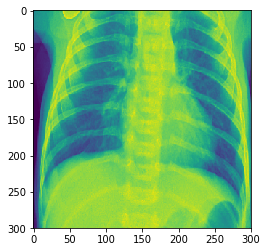

In [20]:
plt.imshow(X[4])

In [21]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [22]:
X.shape

(5216, 300, 300, 1)

In [23]:
cd

C:\Users\Korisnik


In [24]:
np.save("X_pneumo", X)

In [25]:
np.save("Y_pneumo", Y)

In [37]:
cd

C:\Users\Korisnik


In [32]:
X.max()

255

In [17]:

cd

C:\Users\Korisnik


In [41]:
test_data

[[array([[32, 31, 31, ..., 35, 29, 34],
         [32, 31, 31, ..., 33, 33, 32],
         [34, 31, 31, ..., 32, 35, 33],
         ...,
         [29, 30, 30, ..., 34, 35, 33],
         [27, 31, 31, ..., 34, 34, 33],
         [29, 30, 29, ..., 34, 32, 34]], dtype=uint8), 0],
 [array([[  1,  37,  32, ..., 118, 115, 106],
         [  1,  36,  36, ..., 114, 113, 104],
         [  1,  35,  34, ..., 114, 105, 100],
         ...,
         [  1,  37,  37, ...,  33,  30,  31],
         [  2,  41,  39, ...,  33,  34,  31],
         [  1,  41,  42, ...,  34,  34,  30]], dtype=uint8), 0],
 [array([[38, 35, 36, ..., 30, 36, 33],
         [36, 37, 35, ..., 30, 30, 30],
         [36, 38, 39, ..., 27, 33, 23],
         ...,
         [31, 28, 30, ..., 35, 35, 31],
         [28, 29, 28, ..., 35, 36, 33],
         [29, 28, 29, ..., 37, 33, 33]], dtype=uint8), 0],
 [array([[ 75,  74,  71, ..., 150, 163, 195],
         [ 77,  77,  74, ..., 152, 168, 191],
         [ 73,  77,  80, ..., 152, 168, 194],
       

In [42]:
#Shuffle data since we iterated through categories
import random

random.shuffle(test_data)

In [43]:
X_test = []
Y_test = []

In [44]:
for features, label in test_data:
    X_test.append(features)
    Y_test.append(label)

In [45]:
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [46]:
np.save("X_pneumo_test", X_test)

In [ ]:
X_test.size

In [47]:
np.save("Y_pneumo_test", Y_test)